In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
link="https://raw.githubusercontent.com/JeevanshuDua/csvfiles/main/customer%20segmentaion.csv"
df=pd.read_csv(link)

In [3]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D
...,...,...,...,...,...,...,...,...,...,...,...
2621,467950,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,D
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [6]:
df.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [7]:
df.Segmentation.value_counts()

A    692
D    631
B    450
C    381
Name: Segmentation, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

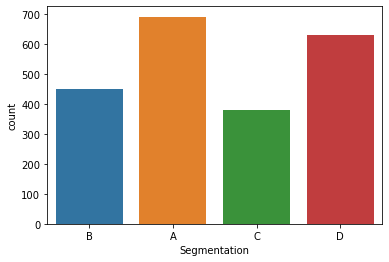

In [8]:
sns.countplot(df.Segmentation)

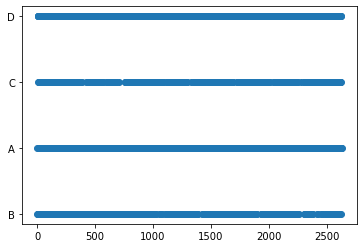

In [10]:
plt.scatter(df.index, df.Segmentation)

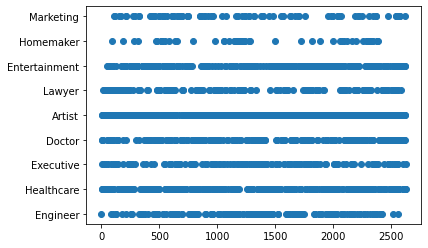

In [13]:
plt.scatter(df.index, df.Profession )

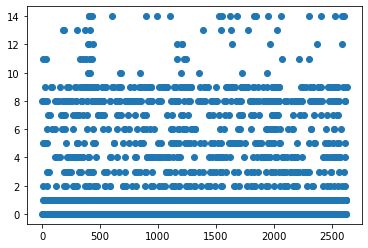

In [14]:
plt.scatter(df.index,df.Work_Experience)

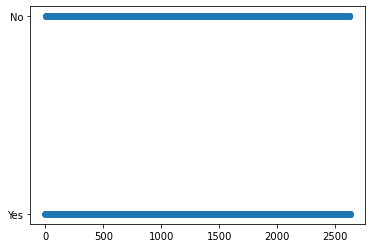

In [15]:
plt.scatter(df.index,df.Graduated)

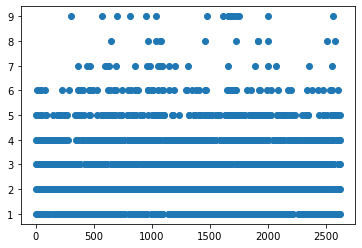

In [16]:
plt.scatter(df.index,df.Family_Size)

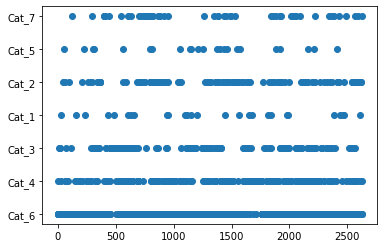

In [18]:
plt.scatter(df.index,df.Var_1)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Work_Experience'>

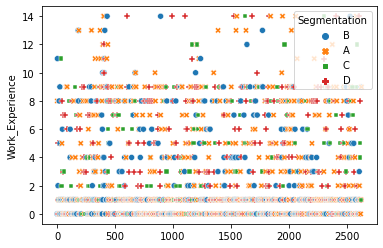

In [20]:
sns.scatterplot(df.index,df.Work_Experience, hue='Segmentation', style='Segmentation', data = df)  

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Family_Size'>

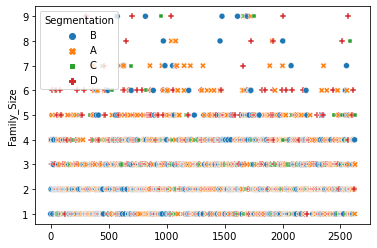

In [22]:
sns.scatterplot(df.index,df.Family_Size, hue='Segmentation', style='Segmentation', data = df)  

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Profession'>

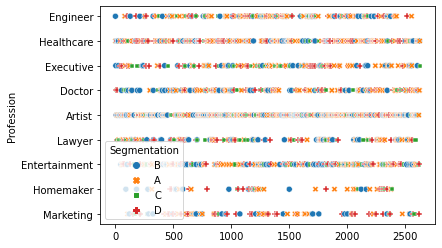

In [26]:
sns.scatterplot(df.index,df.Profession, hue='Segmentation', style='Segmentation', data = df)  

In [30]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in df.columns:
    if isinstance(df[i][0], str):
            df[i] = encoder.fit_transform(df[i])

In [31]:
df.Segmentation.value_counts()

0    692
3    631
1    450
2    381
Name: Segmentation, dtype: int64

In [33]:
df = df.drop(['Gender'], axis = 1)

In [34]:
X = df.drop(['Segmentation'], axis = 1)

In [35]:
y=df['Segmentation']

In [36]:
X

,ID,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,1,36,1,2,0.0,2,1.0,5
1,458994,1,37,1,5,8.0,0,4.0,5
3,459000,1,59,0,4,11.0,1,2.0,5
5,459003,1,47,1,1,0.0,1,5.0,3
6,459005,1,61,1,1,5.0,2,3.0,5
...,...,...,...,...,...,...,...,...,...
2621,467950,0,35,1,3,1.0,2,2.0,5
2622,467954,0,29,0,5,9.0,2,4.0,5
2623,467958,0,35,1,1,1.0,2,1.0,5
2625,467961,1,47,1,4,1.0,1,5.0,3


In [37]:
y

0       1
1       0
3       1
5       2
6       3
       ..
2621    3
2622    1
2623    0
2625    2
2626    0
Name: Segmentation, Length: 2154, dtype: int32

In [38]:
from sklearn.model_selection import train_test_split                                      
train_X, test_X,train_y, test_y = train_test_split(X,y,test_size=.2, random_state = 2)  

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier()

In [41]:
knn.fit(train_X,train_y)

KNeighborsClassifier()

In [43]:
test_X

,ID,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
639,461093,1,38,1,0,1.0,0,4.0,2
1821,465189,1,83,1,7,1.0,1,2.0,5
920,462083,0,22,0,5,0.0,2,5.0,5
1459,463892,0,42,1,0,8.0,2,1.0,5
1132,462768,1,45,1,0,0.0,0,3.0,5
...,...,...,...,...,...,...,...,...,...
890,461988,1,40,0,2,1.0,0,2.0,5
2164,466376,1,52,0,6,4.0,1,3.0,5
200,459592,0,25,0,5,0.0,2,3.0,5
564,460840,1,77,1,7,1.0,2,1.0,5


In [44]:
pred = knn.predict(test_X)
print('My predicted values',pred)
print('My actual values', test_y)


My predicted values [3 1 3 1 3 0 0 3 1 0 3 0 0 0 0 0 0 0 3 0 0 0 1 1 0 2 3 0 1 0 1 2 1 0 0 2 2
 2 2 0 0 2 0 0 3 0 2 0 1 3 2 0 0 0 1 0 1 0 3 0 1 2 2 3 3 0 3 0 3 3 1 1 1 2
 0 0 3 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 1 3 1 0 2 2 3 0 0 2 0 3
 3 3 3 0 1 1 0 0 0 1 1 3 2 0 1 0 2 0 0 0 1 1 0 1 0 0 0 1 2 0 0 0 2 0 0 0 2
 1 0 3 2 0 1 0 2 0 0 3 0 0 0 0 0 0 0 0 1 3 0 3 3 1 0 2 0 2 0 0 1 3 0 0 1 0
 1 2 2 2 0 0 3 1 0 2 1 2 0 0 0 2 0 0 0 1 3 3 3 0 0 3 3 1 0 0 3 2 3 1 0 0 1
 0 1 0 0 3 1 2 0 1 1 3 3 3 0 3 0 3 0 0 3 1 2 0 2 0 1 3 3 0 3 0 2 0 2 2 3 3
 3 3 2 0 2 2 3 3 0 0 0 0 2 0 1 1 0 1 3 3 2 1 0 0 3 2 1 1 3 0 0 1 3 0 0 0 1
 3 0 0 3 0 0 3 0 1 1 1 1 1 0 2 3 0 3 2 3 0 1 1 2 0 3 0 0 3 3 3 2 3 0 0 0 0
 0 1 3 2 0 0 0 3 0 0 0 0 3 1 3 3 2 1 2 3 3 3 0 0 3 0 2 0 3 3 3 0 2 0 3 3 3
 0 0 0 0 0 0 3 2 3 0 0 0 3 1 0 0 3 0 1 3 3 0 3 1 1 3 0 0 0 1 1 0 2 0 0 0 0
 2 0 3 1 0 0 1 0 1 0 1 0 0 3 0 0 0 1 1 3 0 0 0 3]
My actual values 639     2
1821    2
920     0
1459    1
1132    2
       ..
890     2
2164    1
200     

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,test_y)


0.26218097447795824